# Loading the Dataset 

In [8]:
import pandas as pd

df = pd.read_csv("./dataset/Wine_Test_01.csv")
df.head(10)

X = df.drop("quality", axis=1)
y = df["quality"]

# Splitting into train and test set

# Task 1

In [9]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, train_test_split


# a) Display a histogram for each attribute
def plot_all_histograms(X):
    X.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of All Attributes", y=1.02)
    plt.tight_layout()
    plt.show()


# b) Plot histograms of each attribute separated by target Y
def plot_histograms_by_class(X):
    for column in X.columns:
        plt.figure(figsize=(6, 4))
        sns.histplot(data=df, x=column, hue="quality", kde=True, element="step", stat="density", common_norm=False)
        plt.title(f"Distribution of {column} by Wine Quality")
        plt.tight_layout()
        plt.show()


# c) Perform 10 runs of SVM classification with grid search
def run_svm_classification(df):
    X = df.drop("quality", axis=1)
    y = df["quality"]
    
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 0.01, 0.001]
    }

    accuracies = []
    best_params_list = []

    for i in range(10):
        print(f"\nRun {i+1}")
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

        grid = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')
        grid.fit(X_train_scaled, y_train)

        best_model = grid.best_estimator_
        y_pred = best_model.predict(X_test_scaled)
        acc = accuracy_score(y_test, y_pred)

        print("Best Params:", grid.best_params_)
        print("Accuracy:", round(acc, 4))

        best_params_list.append(grid.best_params_)
        accuracies.append(acc)

    avg_acc = np.mean(accuracies)
    std_acc = np.std(accuracies)

    print("\n==== Summary ====")
    print(f"Average Accuracy: {avg_acc:.4f}")
    print(f"Standard Deviation: {std_acc:.4f}")


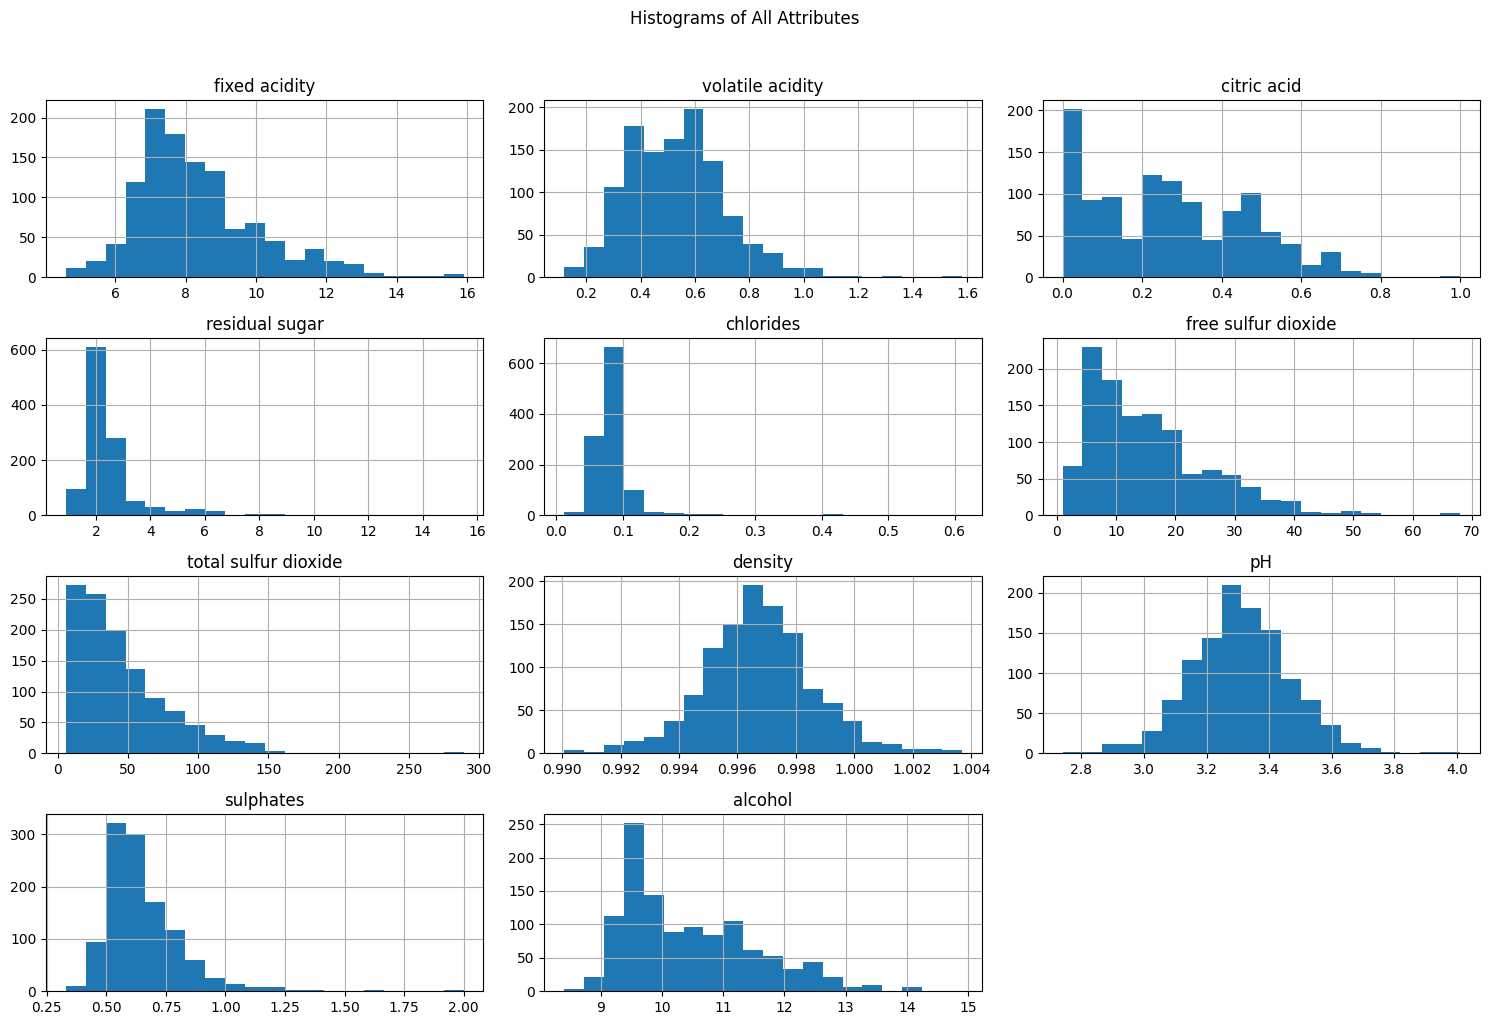

In [10]:
plot_all_histograms(X)

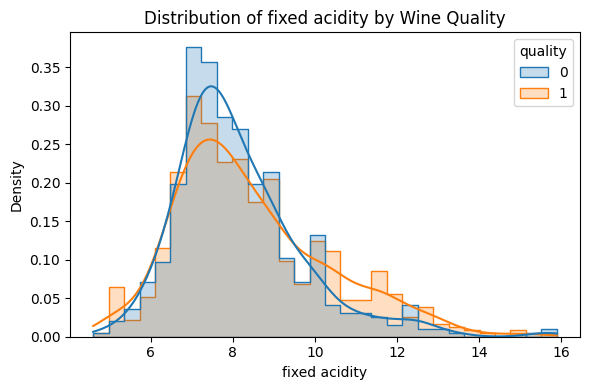

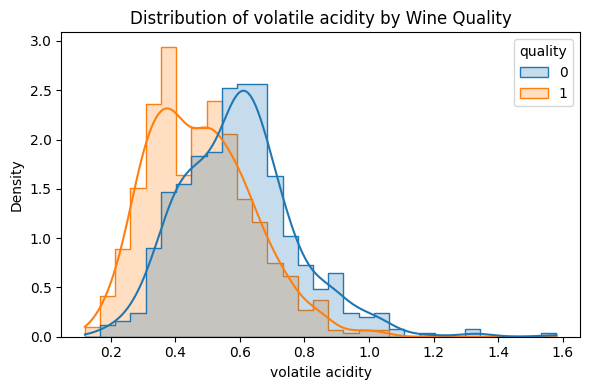

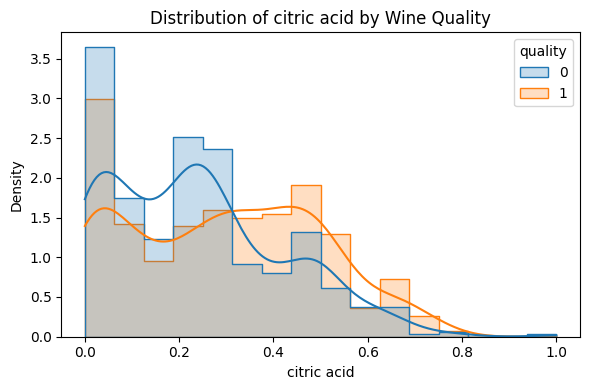

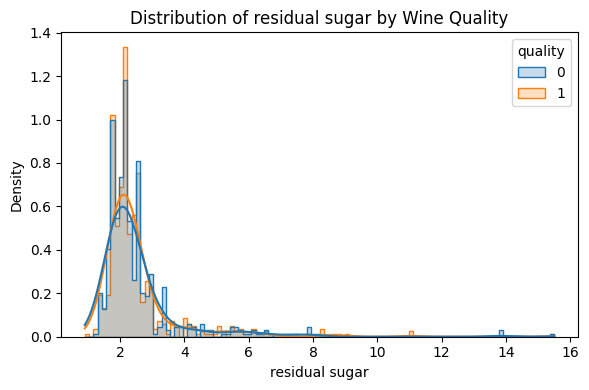

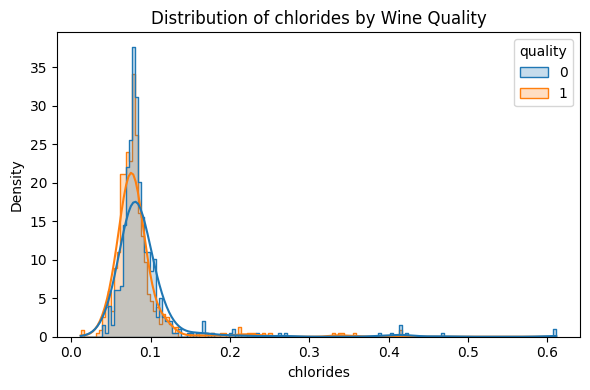

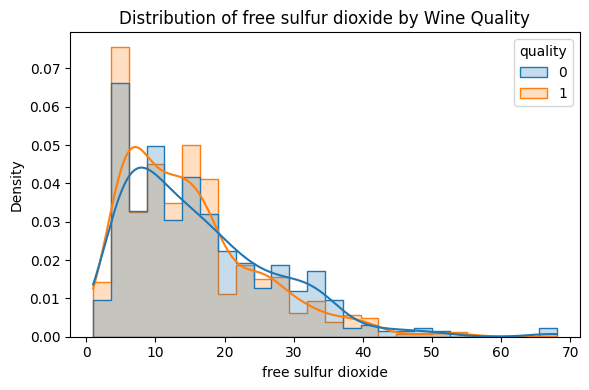

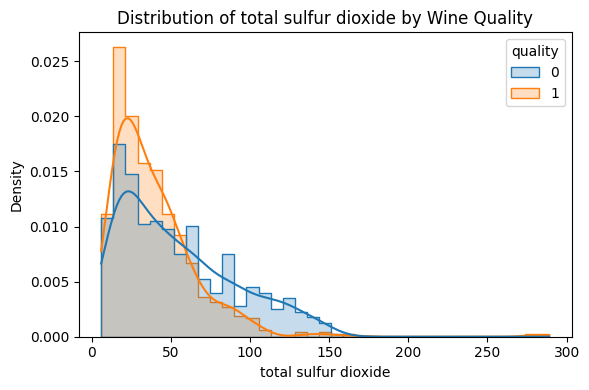

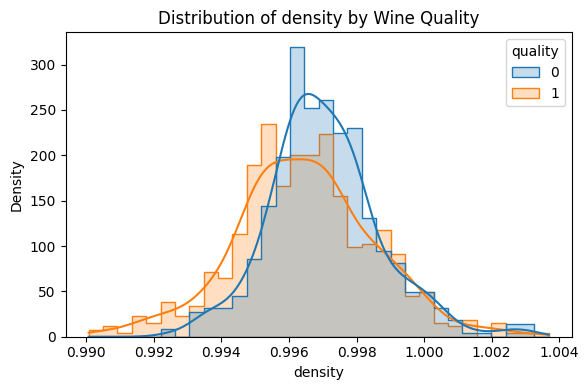

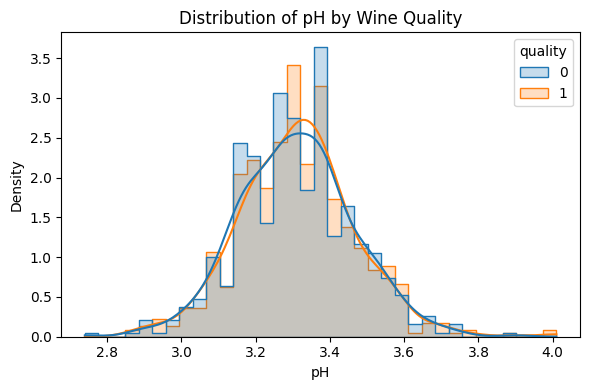

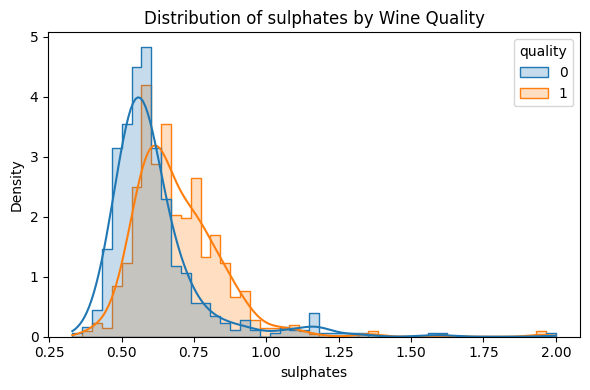

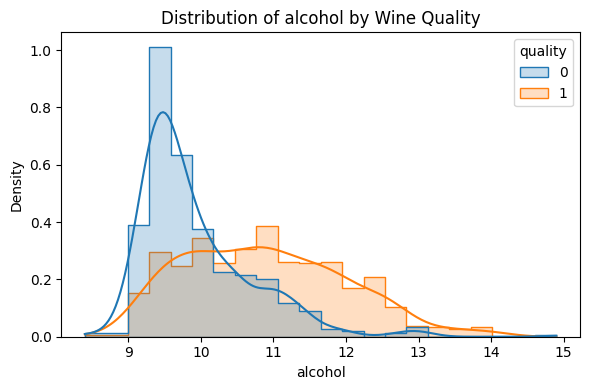

In [11]:
plot_histograms_by_class(X)

In [12]:
run_svm_classification(df)


Run 1
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.786

Run 2
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7817

Run 3
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7511

Run 4
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7467

Run 5
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7817

Run 6
Best Params: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.7424

Run 7
Best Params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.738

Run 8
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7555

Run 9
Best Params: {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
Accuracy: 0.7424

Run 10
Best Params: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7249

==== Summary ====
Average Accuracy: 0.7550
Standard Deviation: 0.0200


# Task 2

In [13]:
# a) Choose an attribute with overlap – we use 'volatile acidity'
def plot_density(attribute='volatile acidity'):
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=attribute, hue="quality", kde=True, element="step", stat="density", common_norm=False)
    plt.title(f"Original Distribution: {attribute}")
    plt.tight_layout()
    plt.show()


# b) Delete samples to increase class separation
def reduce_overlap(attribute='volatile acidity', lower=0.3, upper=0.6):
    df_reduced = df[(df[attribute] < lower) | (df[attribute] > upper)]
    return df_reduced



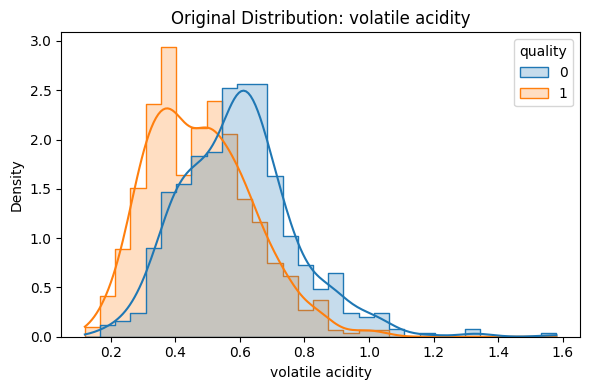

In [14]:
plot_density()

In [16]:
df_reduced = reduce_overlap(attribute='volatile acidity', lower=0.3, upper=0.6)
print(f"Reduced data size: {len(df_reduced)} samples")

Reduced data size: 452 samples


In [17]:
# c) Rerun classification like Task 1c
run_svm_classification(df_reduced)


Run 1
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.6813

Run 2
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7033

Run 3
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7692

Run 4
Best Params: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Accuracy: 0.7143

Run 5
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7363

Run 6
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.6923

Run 7
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7582

Run 8
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7912

Run 9
Best Params: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.7802

Run 10
Best Params: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.7582

==== Summary ====
Average Accuracy: 0.7385
Standard Deviation: 0.0367


# Task 3

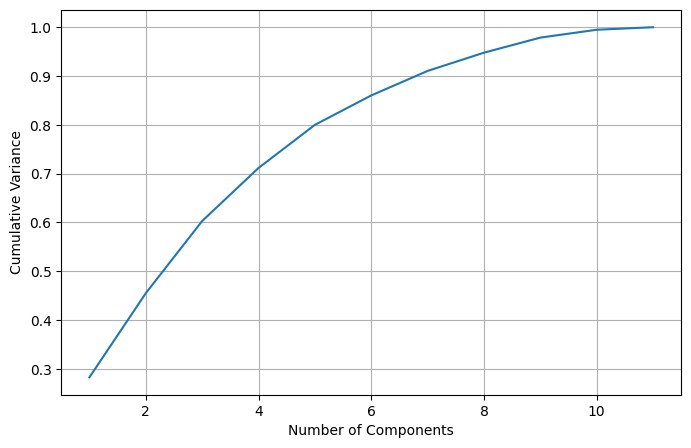

In [18]:
from sklearn.decomposition import PCA

def plot_cumulative_variance(df):
  # 1. Standardize the dataset
  X_train, _, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)
  scaler = StandardScaler()
  X_train_scaled = scaler.fit_transform(X_train)

  # 2. Use the PCA class that does PCA on the dataset
  pca = PCA()
  _ = pca.fit_transform(X_train_scaled)

  # 3. Find and plot the cumulative variance
  cumulative_variance = pca.explained_variance_ratio_.cumsum()
  number_of_components = len(cumulative_variance)

  plt.figure(figsize=(8, 5))
  plt.plot(range(1, number_of_components+1), cumulative_variance)
  plt.xlabel('Number of Components')
  plt.ylabel('Cumulative Variance')
  plt.grid(True)
  plt.show()

plot_cumulative_variance(df)

In [19]:
def run_svm_with_pca(df, n_components=8):
    X = df.drop("quality", axis=1)
    y = df["quality"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Apply PCA
    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    # SVM with Grid Search
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    svm = SVC()
    grid_search = GridSearchCV(svm, param_grid, cv=3)
    grid_search.fit(X_train_pca, y_train)

    best_params = grid_search.best_params_
    y_pred = grid_search.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)

    return accuracy, best_params

In [20]:
accuracy, best_params = run_svm_with_pca(df, n_components=8)

print("Best Hyperparameters:", best_params)
print(f"Test Accuracy with PCA + SVM: {accuracy:.4f}")

Best Hyperparameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy with PCA + SVM: 0.7555


# Task 4

In [21]:
from sklearn.feature_selection import RFE


def run_svm_with_rfe(df, n_features=8):
    X = df.drop("quality", axis=1)
    y = df["quality"]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    base_estimator = SVC(kernel='linear', C=1000, gamma=0.1)
    selector = RFE(base_estimator, n_features_to_select=n_features)
    selector.fit(X_train_scaled, y_train)

    selected_mask = selector.support_
    selected_features = X.columns[selected_mask]
    print("Selected Features:", selected_features.tolist())

    # Reduce feature sets
    X_train_reduced = X_train[selected_features]
    X_test_reduced = X_test[selected_features]

    # Grid search on reduced features
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    }

    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X_train_reduced, y_train)

    best_params = grid.best_params_
    y_pred = grid.predict(X_test_reduced)
    accuracy = accuracy_score(y_test, y_pred)

    return selected_features.tolist(), best_params, accuracy


In [22]:
selected_features, best_params, accuracy = run_svm_with_rfe(df, n_features=8)
print("Best Hyperparameters:", best_params)
print(f"Test Accuracy with RFE + SVM: {accuracy:.4f}")

Selected Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']
Best Hyperparameters: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Test Accuracy with RFE + SVM: 0.7598
